## Imports

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

## Load the CIFAR-10 datasets

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

## Print the shape of train & test images

In [8]:
print("Train images datasets: ", train_images.shape)
print("Test images datasets: ", test_images.shape)

Train images datasets:  (50000, 32, 32, 3)
Test images datasets:  (10000, 32, 32, 3)


## Normalize the datasets

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Encode the labels

In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

## Define CIFAR-10 classes names

In [13]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Display the images in a small grid

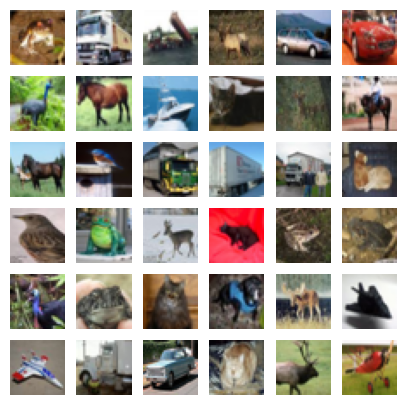

In [20]:
plt.figure(figsize=(5, 5))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.imshow(train_images[i])
    plt.axis('off')
plt.show()

# Build Vision Transformer from Scratch

In [ ]:
def create_vit_model(input_shape=(32, 32, 3), num_classes=10, patch_size=4, num_heads=8, num_layers=6, d_model=256):
    # Create patches
    def create_patches(inputs):
        # Split the image into patches (flattened 2D patches)
        patches = layers.Conv2D(filters=d_model, kernel_size=patch_size, strides=patch_size, padding='valid')(inputs)
        patches = layers.Reshape((-1, d_model))(patches)
        return patches

    # Define the input layer
    inputs = layers.Input(shape=input_shape)
    
    # Create patches
    patches = create_patches(inputs)

    # Positional Encoding
    position_embedding = layers.Embedding(input_dim=patches.shape[1], output_dim=d_model)(tf.range(patches.shape[1]))
    patches += position_embedding

    # Transformer Encoder Layer
    transformer_blocks = patches
    for _ in range(num_layers):
        # Multi-Head Attention Layer
        attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(transformer_blocks, transformer_blocks)
        attention_output = layers.LayerNormalization()(attention_output + transformer_blocks)
        
        # Feedforward Network
        ffn_output = layers.Dense(4 * d_model, activation='relu')(attention_output)
        ffn_output = layers.Dense(d_model)(ffn_output)
        transformer_blocks = layers.LayerNormalization()(ffn_output + attention_output)

    # Global Average Pooling
    x = layers.GlobalAveragePooling1D()(transformer_blocks)

    # Output layer
    x = layers.Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = tf.keras.Model(inputs, x)
    return model

# Create the ViT model
model = create_vit_model(input_shape=(32, 32, 3))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()
